In [ ]:
#En este programa se realizan los retornos logarítmicos con el método de Monte Carlo y con el método de Bootstrapping simple

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import seaborn as sns
from datetime import timedelta
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [4]:
!pip install seaborn

In [5]:
#Carga de datos

df=pd.read_csv('ibex_div_data_close.csv')

In [6]:
df.columns=['Date','close']
df=df.set_index(['Date'])

In [8]:
#retornos logarítmicos

returns = df.pct_change()

log_returns = np.log(1 + df.pct_change())

#log_returns=np.log(df/df.shift(1))
log_returns=log_returns.dropna()
log_returns

,close
Date,
2003-07-31,0.000000
2003-08-01,0.003050
2003-08-04,-0.007231
2003-08-05,0.006638
2003-08-06,-0.009628
...,...
2020-05-27,0.024064
2020-05-28,0.006895
2020-05-29,-0.017823


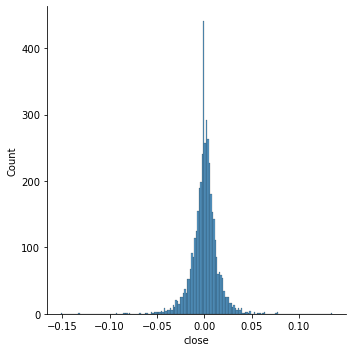

In [9]:
# Figura distribución de los retornos
sns.displot(data=log_returns, x="close")

In [402]:
#Observamos que la distribucion es muy similar a una distribución normal


In [403]:
# Método I: Simulación de Montecarlo

In [404]:
media=log_returns.mean()
desv=log_returns.std()


In [405]:
datainic=pd.to_datetime(df.index[-1])
datafin=datainic+relativedelta(years=5)
dates=pd.date_range(datainic, datafin)
n_sim=1000

In [406]:
lst=list(range(n_sim))
simul = pd.DataFrame(columns=[lst], index=dates)


In [407]:
for i in range(n_sim):
    sim = np.random.normal(media,desv,len(simul))
    simul[i]=sim
    

In [408]:
#Método II: Bootstrapping simple

In [409]:
lst=list(range(n_sim))
simul2 = pd.DataFrame(columns=[lst], index=dates)

In [410]:

for i in range(n_sim):
    sim = np.random.choice(log_returns['close'],len(simul2),replace=True)
    simul2[i]=sim
    


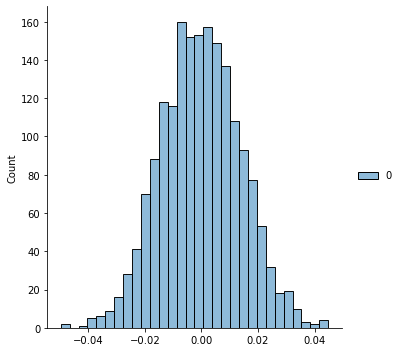

In [411]:
#Retornos de una única simulación
sns.displot(data=simul[0])

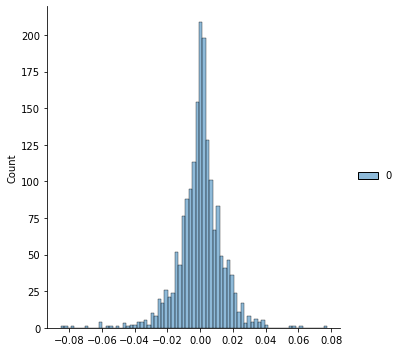

In [412]:
sns.displot(data=simul2[0])

In [413]:
#Observamos que los retornos con Montecarlo simple tienen una menor
#varianza que los de Bootstrapping Simple

In [414]:
#Evolución temporal de invertir una unidad monetaria

log_returns1=simul[0]
log_returns2=simul2[0]


cummulative_r1 = (1+log_returns1).cumprod()
cummulative_r1.fillna(1, inplace = True)

cummulative_r2 = (1+log_returns2).cumprod()
cummulative_r2.fillna(1, inplace = True)


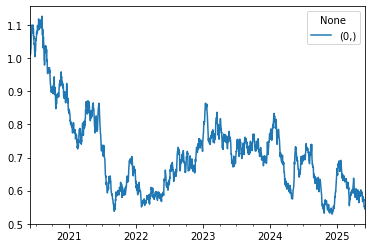

In [415]:
#Método Montecarlo
cummulative_r1.plot()
plt.show()

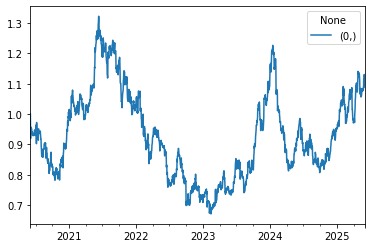

In [416]:
#Método Bootstrapping 

cummulative_r2.plot()
plt.show()

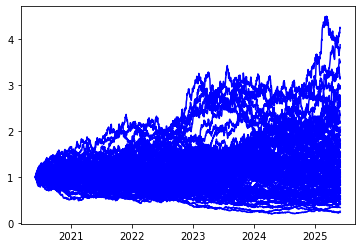

In [417]:
#Figura 100 simulaciones método Montecarlo

for i in range(100):
    log_returns=simul[i]
    cummulative_r1 = (1+log_returns).cumprod()
    cummulative_r1.fillna(1, inplace = True)
    plt.plot(cummulative_r1,"b")
plt.show()

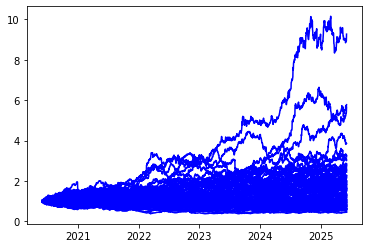

In [418]:
#Figura 100 simulaciones método Bootstrapping simple

for i in range(100):
    log_returns=simul2[i]
    cummulative_r2 = (1+log_returns).cumprod()
    cummulative_r2.fillna(1, inplace = True)
    plt.plot(cummulative_r2,"b")
plt.show()

<AxesSubplot:>

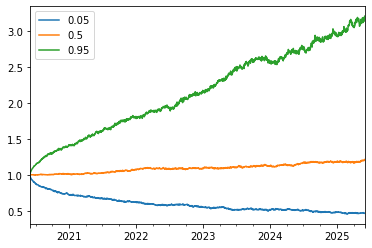

In [419]:
#Retornos percentiles Montecarlo

for i in range(1000):
    log_returns=simul[i]
    cummulative_r1 = (1+log_returns).cumprod()
    cummulative_r1.fillna(1, inplace = True)
    simul[i]=cummulative_r1
    

retornos1=simul.quantile([.05, .5, .95], axis = 1)
retornos1=retornos1.transpose()
retornos1.plot()

<AxesSubplot:>

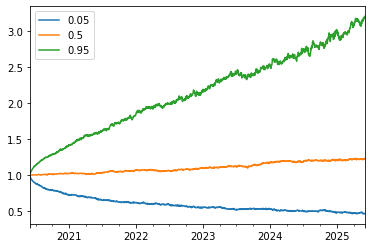

In [420]:
# Retornos percentiles Bootstrapping

for i in range(1000):
    log_returns=simul2[i]
    cummulative_r2 = (1+log_returns).cumprod()
    cummulative_r2.fillna(1, inplace = True)
    simul2[i]=cummulative_r2
    


retornos2=simul2.quantile([.05, .5, .95], axis = 1)
retornos2=retornos2.transpose()
retornos2.plot()

In [421]:
# Teniendo en cuenta la distribución de los retornos según los dos métodos, en el primero 
#  se tiene en cuenta la varianza de los retornos y esto hace que hayan menos valores extremos en la distribución
# y además en este caso también nos lleva a menor varianza. Sin embargo, parece más preciso utilizar datos anteriores en las 
#predicciones como hace el Bootstrapping simple, ya que Montecarlo solo utiliza el dato de la varianza. Por tanto creo que el 
#Bootstrapping es un mejor método para realizar la simulación